<a href="https://colab.research.google.com/github/sub3h/StockAnalysisInPython/blob/master/biasguard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 설치

!pip install python-telegram-bot --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 라이브러리 설치

!pip install dart-fss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# 라이브러리 설치

!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# 라이브러리 설치

!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# 라이브러리 버전 조정

!pip install tornado==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# 라이브러리 임포트

import dart_fss as dart
import telegram as tel
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [77]:
# 종목코드 취득

df_krx = fdr.StockListing('KRX') # KRX는 KOSPI,KOSDAQ,KONEX 모두 포함
df_krx = df_krx[df_krx['Market'] != 'KONEX']
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7556,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7557,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7558,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7559,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7560,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [78]:
len(df_krx)

7438

In [79]:
df_spx = fdr.StockListing('S&P500')
df_spx.head()

/usr/local/lib/python3.7/dist-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [80]:
len(df_spx)

503

In [82]:
df_nsd = fdr.StockListing('NASDAQ')
df_nsd.head()

100%|██████████| 4627/4627 [00:37<00:00, 124.26it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010


In [83]:
len(df_nsd)

4627

In [86]:
# 테스트(현대차 가격 데이터)

df = fdr.DataReader('005380', '2019') # 현대차, 2019년
df.head(10)
df.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-04,181000,183000,175000,178000,1006440,-0.011111
2022-07-05,180000,181000,173500,177500,1097504,-0.002809
2022-07-06,176000,177000,172000,172500,924184,-0.028169
2022-07-07,175000,177000,172500,175000,536363,0.014493
2022-07-08,177500,180500,177000,178000,824702,0.017143
2022-07-11,180000,182000,179000,179000,660814,0.005618
2022-07-12,180000,181500,177000,179000,539027,0.000000
2022-07-13,180000,185000,178500,183500,941277,0.025140
2022-07-14,183000,184500,180500,182500,780637,-0.005450


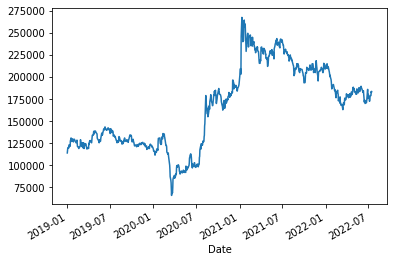

In [87]:
df = fdr.DataReader('005380', '2019')
df['Close'].plot()

In [88]:
# 테스트(AAPL 가격 데이터)

df = fdr.DataReader('AAPL', '2019') # AAPL, 2019년
df.head(10)
df.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-07-01,138.93,136.04,139.04,135.66,71050000.0,0.0162
2022-07-05,141.56,137.77,141.61,136.93,70950000.0,0.0189
2022-07-06,142.92,141.35,144.12,141.08,73550000.0,0.0096
2022-07-07,146.35,143.29,146.55,143.28,65730000.0,0.0240
2022-07-08,147.04,145.26,147.55,145.00,64300000.0,0.0047
2022-07-11,144.87,145.67,146.64,143.78,63310000.0,-0.0148
2022-07-12,145.86,145.76,148.45,145.05,77590000.0,0.0068
2022-07-13,145.49,142.99,146.45,142.12,71190000.0,-0.0025
2022-07-14,148.47,144.08,148.95,143.25,78140000.0,0.0205


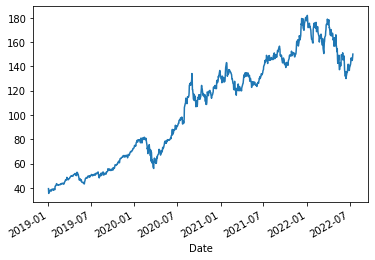

In [89]:
df = fdr.DataReader('AAPL', '2019')
df['Close'].plot()

In [50]:
# 테스트

# Open DART API KEY 설정
api_key='de3a2c4f555e9580eb039810e62c086588ba4428'
dart.set_api_key (api_key=api_key)

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 삼성전자 검색
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

# 2012년부터 연간 연결재무제표 불러오기
# fs = samsung.extract_fs(bgn_de='20210101')

# 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
# fs.save()

In [51]:
# 오늘 나온 공시 검색
# reports = dart.filings.search()

# 2022년 7월 8일부터 2022년 7월 8일까지 코스닥 주식등의대량보유상황보고서 검색 (페이지당 표시 건수: 100)
reports_d = dart.filings.search(bgn_de='20220715', end_de='20220715', page_count=100, corp_cls='K', pblntf_detail_ty='D001')

# 2022년 7월 8일부터 2022년 7월 8일까지 코스피 주식등의대량보유상황보고서 검색 (페이지당 표시 건수: 100)
reports_p = dart.filings.search(bgn_de='20220715', end_de='20220715', page_count=100, corp_cls='Y', pblntf_detail_ty='D001')

In [52]:
reports_p

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00131780',
                  'corp_name': 'SK네트웍스',
                  'flr_nm': 'SK',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000544',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '001740'},
                 {'corp_cls': 'Y',
                  'corp_code': '00103130',
                  'corp_name': '플레이그램',
                  'flr_nm': '하나모두',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000476',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '009810'},
                 {'corp_cls': 'Y',
                  'corp_code': '00164724',
                  'corp_name': '현대엘리베이터',
                  'flr_nm': '현정은',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000388',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '017800'},
                 {'corp_cls': 'Y',
                  'corp_code': '00152385',
                  'corp_name': '에이프로젠 MED',
                  'flr_nm': '지베이스',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000365',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '007460'},
                 {'corp_cls': 'Y',
                  'corp_code': '00103662',
                  'corp_name': '광명전기',
                  'flr_nm': '이재광',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000337',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '017040'},
                 {'corp_cls': 'Y',
                  'corp_code': '00137207',
                  'corp_name': '유니켐',
                  'flr_nm': '지브이에이자산운용',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000314',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '011330'},
                 {'corp_cls': 'Y',
                  'corp_code': '00108135',
                  'corp_name': '녹십자홀딩스',
                  'flr_nm': '허일섭',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000253',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '005250'},
                 {'corp_cls': 'Y',
                  'corp_code': '00118044',
                  'corp_name': '동원수산',
                  'flr_nm': '왕기철',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000242',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '030720'},
                 {'corp_cls': 'Y',
                  'corp_code': '00117498',
                  'corp_name': '스틱인베스트먼트',
                  'flr_nm': '도용환',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000195',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '026890'},
                 {'corp_cls': 'Y',
                  'corp_code': '00117498',
                  'corp_name': '스틱인베스트먼트',
                  'flr_nm': '도용환',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000144',
                  'report_nm': '[기재정정]주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '026890'},
                 {'corp_cls': 'Y',
                  'corp_code': '00173795',
                  'corp_name': '신흥',
                  'flr_nm': '이용익',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000108',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
            

In [53]:
reports_d

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'K',
                  'corp_code': '00384717',
                  'corp_name': '비엘팜텍',
                  'flr_nm': '비엘',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000501',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '065170'},
                 {'corp_cls': 'K',
                  'corp_code': '00145738',
                  'corp_name': '이화전기',
                  'flr_nm': '이트론',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000477',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '024810'},
                 {'corp_cls': 'K',
                  'corp_code': '00866062',
                  'corp_name': '엘티씨',
                  'flr_nm': '수성자산운용',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000471',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '170920'},
                 {'corp_cls': 'K',
                  'corp_code': '01264872',
                  'corp_name': '이노뎁',
                  'flr_nm': '이성진',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000453',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '303530'},
                 {'corp_cls': 'K',
                  'corp_code': '00444329',
                  'corp_name': '위메이드',
                  'flr_nm': '박관호',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000436',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '112040'},
                 {'corp_cls': 'K',
                  'corp_code': '00569646',
                  'corp_name': '영우디에스피',
                  'flr_nm': '박금성',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000422',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '143540'},
                 {'corp_cls': 'K',
                  'corp_code': '00291860',
                  'corp_name': '조광ILI',
                  'flr_nm': '김우동',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000412',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '044060'},
                 {'corp_cls': 'K',
                  'corp_code': '00125965',
                  'corp_name': 'KH 전자',
                  'flr_nm': '유니온 신기술조합 제217호',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000396',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '111870'},
                 {'corp_cls': 'K',
                  'corp_code': '01358463',
                  'corp_name': '현대무벡스',
                  'flr_nm': '현대엘리베이터',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000395',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '319400'},
                 {'corp_cls': 'K',
                  'corp_code': '00490151',
                  'corp_name': '파트론',
                  'flr_nm': '김종구',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000372',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '091700'},
                 {'corp_cls': 'K',
                  'corp_code': '01290381',
                  'corp_name': '피엔케이피부임상연구센타',
                  'flr_nm': '대봉엘에스',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000368',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
             

In [54]:
p_dict = reports_p.to_dict()

In [55]:
p_dict

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
   'corp_code': '00131780',
   'corp_name': 'SK네트웍스',
   'flr_nm': 'SK',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000544',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '001740'},
  {'corp_cls': 'Y',
   'corp_code': '00103130',
   'corp_name': '플레이그램',
   'flr_nm': '하나모두',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000476',
   'report_nm': '주식등의대량보유상황보고서(약식)',
   'rm': '',
   'stock_code': '009810'},
  {'corp_cls': 'Y',
   'corp_code': '00164724',
   'corp_name': '현대엘리베이터',
   'flr_nm': '현정은',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000388',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '017800'},
  {'corp_cls': 'Y',
   'corp_code': '00152385',
   'corp_name': '에이프로젠 MED',
   'flr_nm': '지베이스',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000365',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '007460'},
  {'corp_cls': 'Y',
   'co

In [56]:
p_dict['report_list'][4]['rcp_no']

'20220715000365'

In [57]:
# 테스트 메세지 보내기
token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
bot = tel.Bot(token=token)
# chat_id = 567604016
chat_id = -1001702583415


bot.sendMessage(chat_id=chat_id, text="Test Message")

In [58]:
bot.sendMessage(chat_id=chat_id, text=p_dict['report_list'][4]['rcp_no'])

In [59]:
bot.sendMessage(chat_id=chat_id, text='https://dart.fss.or.kr/dsaf001/main.do?rcpNo='+p_dict['report_list'][4]['rcp_no'])

In [62]:
dart.api.shareholder.majorstock(p_dict['report_list'][4]['corp_code'])

{'list': [{'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,471,762',
   'ctr_stkrt': '8.01',
   'rcept_dt': '2020-10-30',
   'rcept_no': '20201030000430',
   'report_resn': '주식 담보계약 연장',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,900,533',
   'stkqy_irds': '0',
   'stkrt': '32.07',
   'stkrt_irds': '0'},
  {'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,471,762',
   'ctr_stkrt': '8.01',
   'rcept_dt': '2020-12-24',
   'rcept_no': '20201224000426',
   'report_resn': '주식 장내매수',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,950,533',
   'stkqy_irds': '50,000',
   'stkrt': '32.19',
   'stkrt_irds': '0.12'},
  {'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,671,907',
   'ctr_stkrt': '8.47',
   'rcept_dt': '2020-12-30',
   'rcept_no': '20201230000731',
   'report_resn': '주식 담보(공탁) 계약',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,950,533',
   'stkqy_irds': '0',
   'stkrt': '32.19',
   'stkrt

In [63]:
dart.api.shareholder.elestock(p_dict['report_list'][4]['corp_code'])

NoDataReceived: ignored

In [46]:
# sp_stock_lmp_cnt 변동 후 주식수
# sp_stock_lmp_irds_cnt : 증감 주식수
# sp_stock_lmp_irds_rate : 증감 지분율
# sp_stock_lmp_rate : 변동후 지분율

1. 특정종목<br>
2. 6시간 마다<br>
3. 뉴스링크를 수집하고<br>
4. 새로운 링크가 있으면 텔레그램 메세지를 나에게 보내주는 코드

In [20]:
# # 라이브러리 불러오기
# import requests
# from bs4 import BeautifulSoup
# from apscheduler.schedulers.blocking import BlockingScheduler

# # 검색 키워드
# search_word = '엘앤씨바이오'

# # 텔레그램 봇 생성
# token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
# bot = telegram.Bot(token=token)

# # 스케쥴러 생성
# sched = BlockingScheduler()

# # 기존에 보냈던 링크를 담아둘 리스트
# old_links = []

# # 링크 추출 함수
# def extract_links(old_links=[]):
#     url = f'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query={search_word}'
#     req = requests.get(url)
#     html = req.text
#     soup = BeautifulSoup(html, 'html.parser')

#     search_result = soup.select_one('#news_result_list')
#     news_list = search_result.select('.bx > .news_wrap > a')

#     links = []
#     for news in news_list[:5]:
#         link = news['href']
#         links.append(link)
    
#     new_links=[]
#     for link in links:
#         if link not in old_links:
#             new_links.append(link)
    
#     return new_links
    
# # 텔레그램 메시지 전송 함수
# def send_links():
#     global old_links
#     new_links = extract_links(old_links)
#     if new_links:
#         for link in new_links:
#             bot.sendMessage(chat_id=567604016, text=link)
#     else:
#         bot.sendMessage(chat_id=567604016, text='새로운 뉴스 없음')
#     old_links += new_links.copy()
#     old_links = list(set(old_links))

# # 최초 시작
# send_links()
# # 스케쥴러 세팅 및 작동
# sched.add_job(send_links, 'interval', hours=6)
# sched.start()

In [21]:
# #Bot_StockMarketAnalysis.py

# import time
# import telegram
# from _datetime import datetime
# from bs4 import BeautifulSoup
# import numpy as np
# import pandas as pd
# from pandas import DataFrame
# from selenium import webdriver
# import json
# import os

# admin_info_file = os.getenv('APPLICATION_ADMIN_INFO') # 환경 변수에 저장한 중요 개인 정보 불러옴

# token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
# Bot_ID = 567604016 


# def Search_Daily(stock, term):
#   web = webdriver.Chrome('chromedriver.exe')  # 크롬 웹 드라이버(본 py파일과 동일위치에 파일이 있을 경우는 별도 경로 불필요)
#   if stock != 'SEMICON':
#     url = 'https://m.stock.naver.com/sise/siseIndex.nhn?code=%s'%(stock)
#   else:
#     url = 'https://m.stock.naver.com/world/item.nhn?symbol=NAS@SOX'

#     web.get(url)
#     time.sleep(3)  # 데이터가 화면에 완전히 뜰 수 있도록 기다림
#     html_source = web.page_source
#     web.close()  # 크롬 웹드라이버 닫음

#     soup = BeautifulSoup(html_source, 'html.parser')

#     table = soup.find_all('td', class_='_child_wrapper')

#     cnt = 0  # 받은 데이터 자리 확인용(날짜, 종가)
#     date = []
#     close = []

#     df = DataFrame()
#     dt = datetime.now()  # 날짜 오류 방지를 위해 현재 날짜받아옴

#     for i in table:

#         if cnt == 0 or cnt % 7 == 0:  # 날짜 저장(0번과 7의 배수자리이므로 7을 나눠서 나머지가 0인 자리)
#             if dt.month < 5:  # 오늘이 5월 이전일 경우
#                 if i.text[:2] == '01':  # 1월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '02':  # 2월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '03':  # 3월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '04':  # 4월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 else:  # 모두 아닐 경우는 작년데이터로 처리
#                     date.append(str(dt.year - 1) + '-' + (i.text).replace('.', '-'))
#             else:
#                 date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#         elif cnt == 1 or (cnt - 1) % 7 == 0:  # 종가 저장(1번과 6의 배수자리)
#             close.append((i.text).replace(',', ''))

#         cnt += 1

#     df['DATE'] = date
#     df['CLOSE'] = close

#     df['CLOSE'] = pd.to_numeric(df['CLOSE'])  # 게산을 위해서 숫자형으로 변환

#     df = df[['DATE', 'CLOSE']]
#     df = df.sort_values(by='DATE')
#     df = df.set_index('DATE', inplace=False)

#     df['MA3'] = df['CLOSE'].rolling(window=3).mean()  # 종가 3일 평균 열 생성
#     df['MA5'] = df['CLOSE'].rolling(window=5).mean()  # 종가 5일 평균 열 생성
#     df['MA10'] = df['CLOSE'].rolling(window=10).mean()  # 종가 10일 평균 열 생성
#     df['MA20'] = df['CLOSE'].rolling(window=20).mean()  # 종가 20일 평균 열 생성
#     df['SUM1'] = np.where(df['CLOSE'] - df['MA3'] > 0, 1, 0)  # 종가 > 3일 평균이면 1점, 아니면 0점 부여
#     df['SUM2'] = np.where(df['CLOSE'] - df['MA5'] > 0, 1, 0)  # 종가 > 5일 평균이면 1점, 아니면 0점 부여
#     df['SUM3'] = np.where(df['CLOSE'] - df['MA10'] > 0, 1, 0)  # 종가 > 10일 평균이면 1점, 아니면 0점 부여
#     df['SUM4'] = np.where(df['CLOSE'] - df['MA20'] > 0, 1, 0)  # 종가 > 20일 평균이면 1점, 아니면 0점 부여
#     df['SUM'] = df['SUM1'] + df['SUM2'] + df['SUM3'] + df['SUM4']  # 부여 점수 합 계산

#     score = 0
#     for i in range(1, term + 1):
#         score = np.where(df['CLOSE'] / df['CLOSE'].shift(i) > 1, 1,0) + score  # 마지막 날 기준으로 1일전 ~ 20일전까지 일별 비교하여 높으면 1, 낮으면 0으로 스코어 매겨서 더함
#     score = str(score[len(score) - 1] / term * 100)  # 기간으로 나눠서 평균모멘텀 게산함

#     result = str(df['SUM'][len(df) - 1])
#     return score, result


# if __name__ == '__main__':
#     stock = ['KOSPI', 'KOSDAQ', 'SEMICON']
#     term = 20  # 기간은 임의 지정
#     Result_data = []

#     for i in stock:
#         score, result = Search_Daily(i, term)
#         Result_data.append(score)
#         Result_data.append(result)

#     # 결과 텔레그램 전송
#     bot = tel.Bot(token)
#     bot.sendMessage(Bot_ID, '<주가지수모멘텀>' + '\n' + '1. 20일 평균 모멘텀' + '\n\t\t\t\t' + stock[0] + ' : ' + Result_data[0] + '%' + '\n\t\t\t\t'
#                         + stock[1] + ' : ' + Result_data[2] + '%' + '\n\t\t\t\t' + '반도체지수' + ' : ' + Result_data[4] + '%' + '\n'
#                         + '2. 이동평균 모멘텀(4점)' + '\n\t\t\t\t' + stock[0] + ' : ' + Result_data[1] + '\n\t\t\t\t'
#                         + stock[1] + ' : ' + Result_data[3] + '\n\t\t\t\t' + '반도체지수' + ' : ' + Result_data[5])

In [22]:
# from telegram.ext import Updater
# from telegram.ext import CommandHandler
 
# telegram_token = '5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q'
# telegram_chat_id = '567604016'
 
# bot = telegram.Bot(token = telegram_token)
# updater = Updater(token = telegram_token)
 
# def send_message(update, context):
#         bot.sendMessage(chat_id = telegram_chat_id, text = '챗봇 자동응답')
 
# def add_handler(cmd, func):
#         updater.dispatcher.add_handler(CommandHandler(cmd, func))
 
# add_handler('send', send_message)
 
# updater.start_polling()
# updater.idle()

In [23]:
# from telegram.ext import Updater
# from telegram.ext import MessageHandler, Filters
# import requests 
# from bs4 import BeautifulSoup

# # token
# with open("./token.txt") as f:
#     lines = f.readlines()
#     token = lines[0].strip()

# # updater 
# updater = Updater(token=token, use_context=True)
# dispatcher = updater.dispatcher

# def get_dividiend(code):
#     url = "https://finance.naver.com/item/main.nhn?code=" + code
#     resp = requests.get(url)
#     html = resp.text
#     soup = BeautifulSoup(html, "html5lib")
#     tags = soup.select("#_dvr")
#     dividend = tags[0].text
#     return dividend

# # message handler
# def echo(update, context):
#     user_id = update.effective_chat.id
#     user_text = update.message.text
#     dividend = get_dividiend(user_text)
#     text = f"배당수익률: {dividend}"
#     context.bot.send_message(chat_id=user_id, text=text)

# echo_handler = MessageHandler(Filters.text & (~Filters.command), echo)
# dispatcher.add_handler(echo_handler)

# # polling
# updater.start_polling()

In [24]:
# # 다른 방법

# # 라이브러리 임포트
# import requests
# import json

# # API 키 값 설정
# crtfc_key='de3a2c4f555e9580eb039810e62c086588ba4428'

# # 함수 정의
# def request_get(url) :
#     response = ""
#     cnt2 = 0
#     while str(response) != '<Response [200]>' and cnt2 < 10:
# #            print("requests request_get", url)
#         cnt2 += 1
#         try :
#             response = requests.get(url)
#             if str(response) != '<Response [200]>':
#                 print('sleep ', url)
#                 sleep(15)
#         except Exception as e:
#             print(e)
#             time.sleep(20)
#             continue
#     return response.json()

# # 특정 기업 지분 공시 내역 검색 (공시정보)
# # https://opendart.fss.or.kr/api/list.json
# # corp_cls : 법인구분 : Y(유가), K(코스닥), N(코넥스), E(기타) 없으면 전체조회
# # pblntf_ty : A : 정기공시 B : 주요사항보고 C : 발행공시 D : 지분공시 E : 기타공시
# #             F : 외부감사관련 G : 펀드공시 H : 자산유동화 I : 거래소공시 j : 공정위공시
# # https://opendart.fss.or.kr/api/list.json?crtfc_key=xxx&pblntf_ty=D&&bgn_de=20200518&end_de=20200522&corp_cls=Y&page_no=1&page_count=10

# def find_major_holder_change_all(pblntf_ty, begin ,end) :
#     home = 'https://opendart.fss.or.kr/api/list.json'
#     url = home + '?crtfc_key=' + crtfc_key + '&pblntf_ty=D' + '&bgn_de=' + \
#           begin+ '&end_de=' + end + '&corp_cls=Y&page_no=1&page_count=10'
#     print(url)
#     res = request_get(url)

#     for info in res['list'] :
#         print(info)
#     print('')



# # corp_cls : 법인구분 : Y(유가), K(코스닥), N(코넥스), E(기타) 없으면 전체조회
# # pblntf_ty : A : 정기공시 B : 주요사항보고 C : 발행공시 D : 지분공시 E : 기타공시
# #             F : 외부감사관련 G : 펀드공시 H : 자산유동화 I : 거래소공시 j : 공정위공시
# res = find_major_holder_change_all('D', '20220715', '20220715')  # type, begin, end
# print('')

In [25]:
# import telegram
 
# from telegram.ext import Updater
# from telegram.ext import CommandHandler
 
# telegram_token = '5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q'
# telegram_chat_id = '567604016'
 
# bot = telegram.Bot(token = telegram_token)
# updater = Updater(token = telegram_token)
 
# def send_message(update, context):
#         bot.sendMessage(chat_id = telegram_chat_id, text = '챗봇 자동응답')
 
# def add_handler(cmd, func):
#         updater.dispatcher.add_handler(CommandHandler(cmd, func))
 
# add_handler('send', send_message)
 
# updater.start_polling()
# updater.idle()